In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [40]:
# set paths to folders containing CSV files
path1 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_po1.csv"
path2 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pdmp1.csv"
path3 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pin1.csv"

all_files = [path1, path2, path3]
dfs = []

for filename in all_files:
    with open(filename, 'r') as f:
        csv_string = f.read()

    data = csv_string
    df = pd.DataFrame([x.split(',') for x in data.split('\n')])
    df.drop(df.tail(1).index,inplace=True)
    dfs.append(df)

df_combined1, df_combined2, df_combined3 = dfs[0], dfs[1], dfs[2]

# process dataframe 1
df1 = df_combined1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

mincol1 = df1.count(axis=1)
min_elements1 = mincol1.min()
df1 = df1.iloc[:, :min_elements1]

# process dataframe 2
df2 = df_combined2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

mincol2 = df2.count(axis=1)
min_elements2 = mincol2.min()
df2 = df2.iloc[:, :min_elements2]

# process dataframe 3
df3 = df_combined3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)

mincol3 = df3.count(axis=1)
min_elements3 = mincol3.min()
df3 = df3.iloc[:, :min_elements3]

In [41]:
# Assign Fault label to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [42]:
# del fault label column 

df1.columns = df1.columns.astype(str)
del df1[df1.columns[0]]

df2.columns = df2.columns.astype(str)
del df2[df2.columns[0]]

df3.columns = df3.columns.astype(str)
del df3[df3.columns[0]]

In [43]:
# Perform PCA on the data

pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(df1)

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(df2)

pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(df3)

In [44]:
# Create a DataFrame df_pca with the principal components and cluster labels

df_pca1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'], index=df1.index)

df_pca2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'], index=df2.index)

df_pca3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'], index=df3.index)

c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


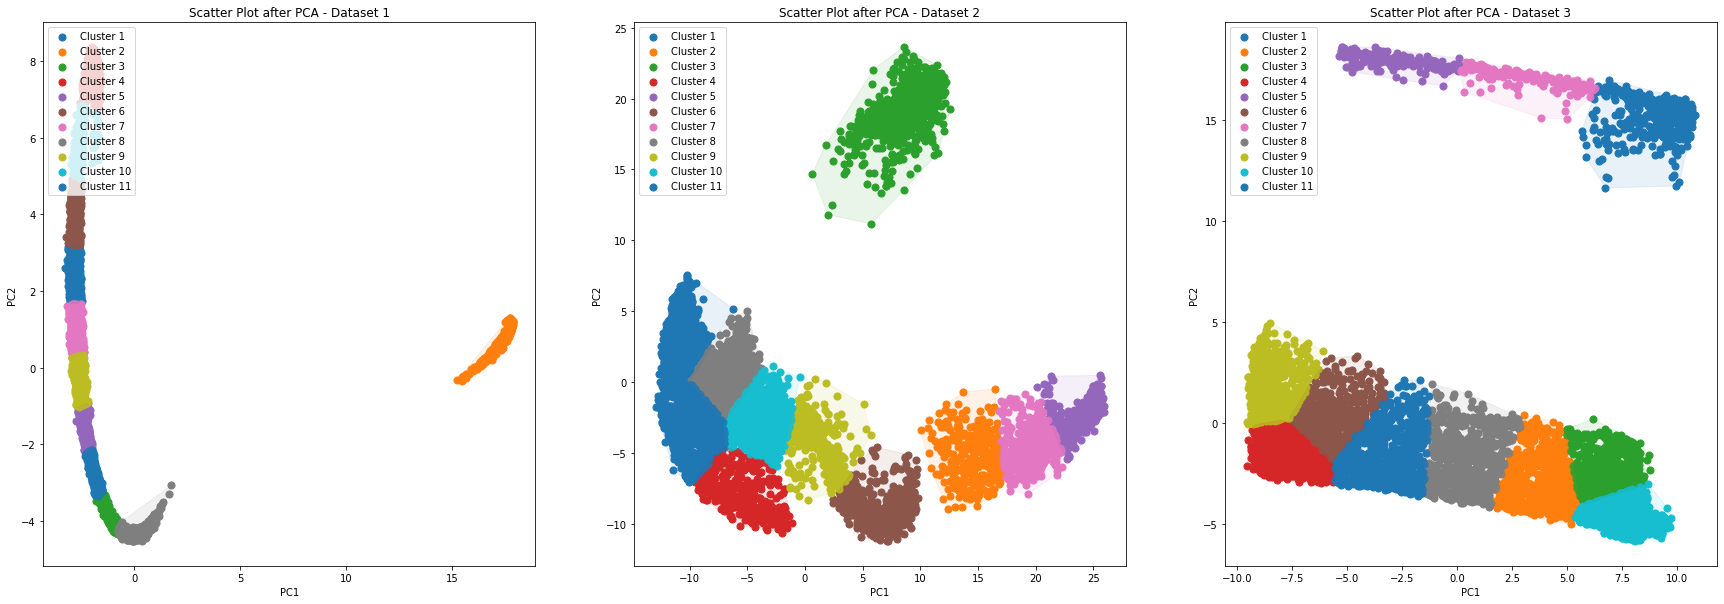

In [45]:
def plot_clusters(df_list, num_clusters=11):
    # Create a list of unique colors for each cluster
    colors = sns.color_palette('tab10', num_clusters)

    fig, axs = plt.subplots(1, len(df_list), figsize=(10*len(df_list), 10))

    # Create a separate scatter plot for each dataframe
    for j, df in enumerate(df_list):
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df[['PC1', 'PC2']])
        df['cluster'] = kmeans.labels_
        ax = axs[j]
        for i in range(num_clusters):
            ax.scatter(df.loc[df['cluster']==i, 'PC1'], df.loc[df['cluster']==i, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
        ax.set_title(f'Scatter Plot after PCA - Dataset {j+1}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.legend(loc='upper left')

        # Draw convex hulls
        for i in range(num_clusters):
            cluster_points = df.loc[df['cluster']==i, ['PC1', 'PC2']]
            hull = ConvexHull(cluster_points)
            ax.fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

    plt.show()

# Example usage with three dataframes df1, df2, df3:
plot_clusters([df_pca1, df_pca2, df_pca3], num_clusters=11)

In [46]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true1, df_pca1["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1    2    3    4    5    6    7    8    9    10
Fault                                                         
1.0       62    0  100    0  117   10   94   20  113    0  131
2.0        0  745    0    0    0    0    0    0    0    0    0
3.0      103    0    0   90    4  155   67    0   26  201    0
4.0        3    0  187    0  102    0   29  162   49    0  125
5.0       67    0   75    0  116   33   97    6  136    1  113
6.0        0    0    0  569    0    2    0    0    0   68    0
7.0        0    0  194    0   13    0    1  316    2    0  142
8.0       15    0  174    0  129    0   56   49   92    0  141
9.0      109    0    9    1   90  120  115    0  101   48   47
10.0       2    0  187    0  101    0   25  127   80    0  149
11.0     107    0   56    0  132   45  127    0  111   10  110


In [47]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true2, df_pca2["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1    2    3    4    5    6    7    8    9    10
Fault                                                         
1.0       20    0    0  323    0    0    0    1    0    4  299
2.0        0    0  745    0    0    0    0    0    0    0    0
3.0        1    0    0    7    0    0    0  308  131  193    6
4.0        0  297    0    0   75    0  285    0    0    0    0
5.0      258    0    0   18    0    0    0  121    0  123  124
6.0        0    8    0    0  384    0  247    0    0    0    0
7.0      317    0    0   43    0    0    0  142    0   50  116
8.0      226    0    0   43    0    0    0  137   43  149   58
9.0        0    0    0    0    0  486    0    0  153    1    0
10.0     257    0    0    4    0    0    0  109    1  191  109
11.0     352    0    0    0    0    0    0  214    0  132    0


In [48]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true3, df_pca3["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1    2    3    4    5    6   7    8    9   10
Fault                                                       
1.0        0   71    0  241    0   15    0  60   44  134  82
2.0      406    0    0    0  179    0  160   0    0    0   0
3.0        0   71  146  262    0   14    0  68    0    3  82
4.0        0   80   11   51    0   65    0  78  125  194  53
5.0        0   71    0  276    0    8    0  61   13  129  86
6.0        0   46  124   95    0  136    0  91   91    1  55
7.0        0   59  235    0    0   69    0  67  164   34  40
8.0        0  125   53    7    0   74    0  70   32  237  58
9.0        0   80   38  208    0    0    0  63    5  154  92
10.0       0   69   24   57    0   63    0  68  140  194  56
11.0       0   89  212    3    0  241    0  74    8    0  71
